# Imports and reading data

In [ ]:
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from scipy.stats import norm


from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, KFold, LeavePOut, RepeatedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV



import math
import random

from pandas_profiling import ProfileReport

In [ ]:
# decide if to print graph as image or not (for html file)
is_to_image = True

In [ ]:
# download and install `orca` and dependencies
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
'''%%shell
jupyter nbconvert --to html "/content/House_Prices.ipynb"'''

'%%shell\njupyter nbconvert --to html "/content/House_Prices.ipynb"'

Read our data

In [ ]:
!git clone https://gist.github.com/f1640dd059ecae8df5bc6f9875a52839.git
df = pd.read_csv('/content/f1640dd059ecae8df5bc6f9875a52839/house_prices_train.csv')

fatal: destination path 'f1640dd059ecae8df5bc6f9875a52839' already exists and is not an empty directory.


# EDA

Lets see how the data looks

In [ ]:
display(df.head())
display(df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
quantitative = [feature for feature in df.columns if df.dtypes[feature] != 'object' and len(df[feature].unique())>20]
quantitative.remove('Id')
quantitative.remove('SalePrice')
qualitative = [feature for feature in df.columns if not (df.dtypes[feature] != 'object' and len(df[feature].unique())>20)]

Lets see the distribution graph of few features

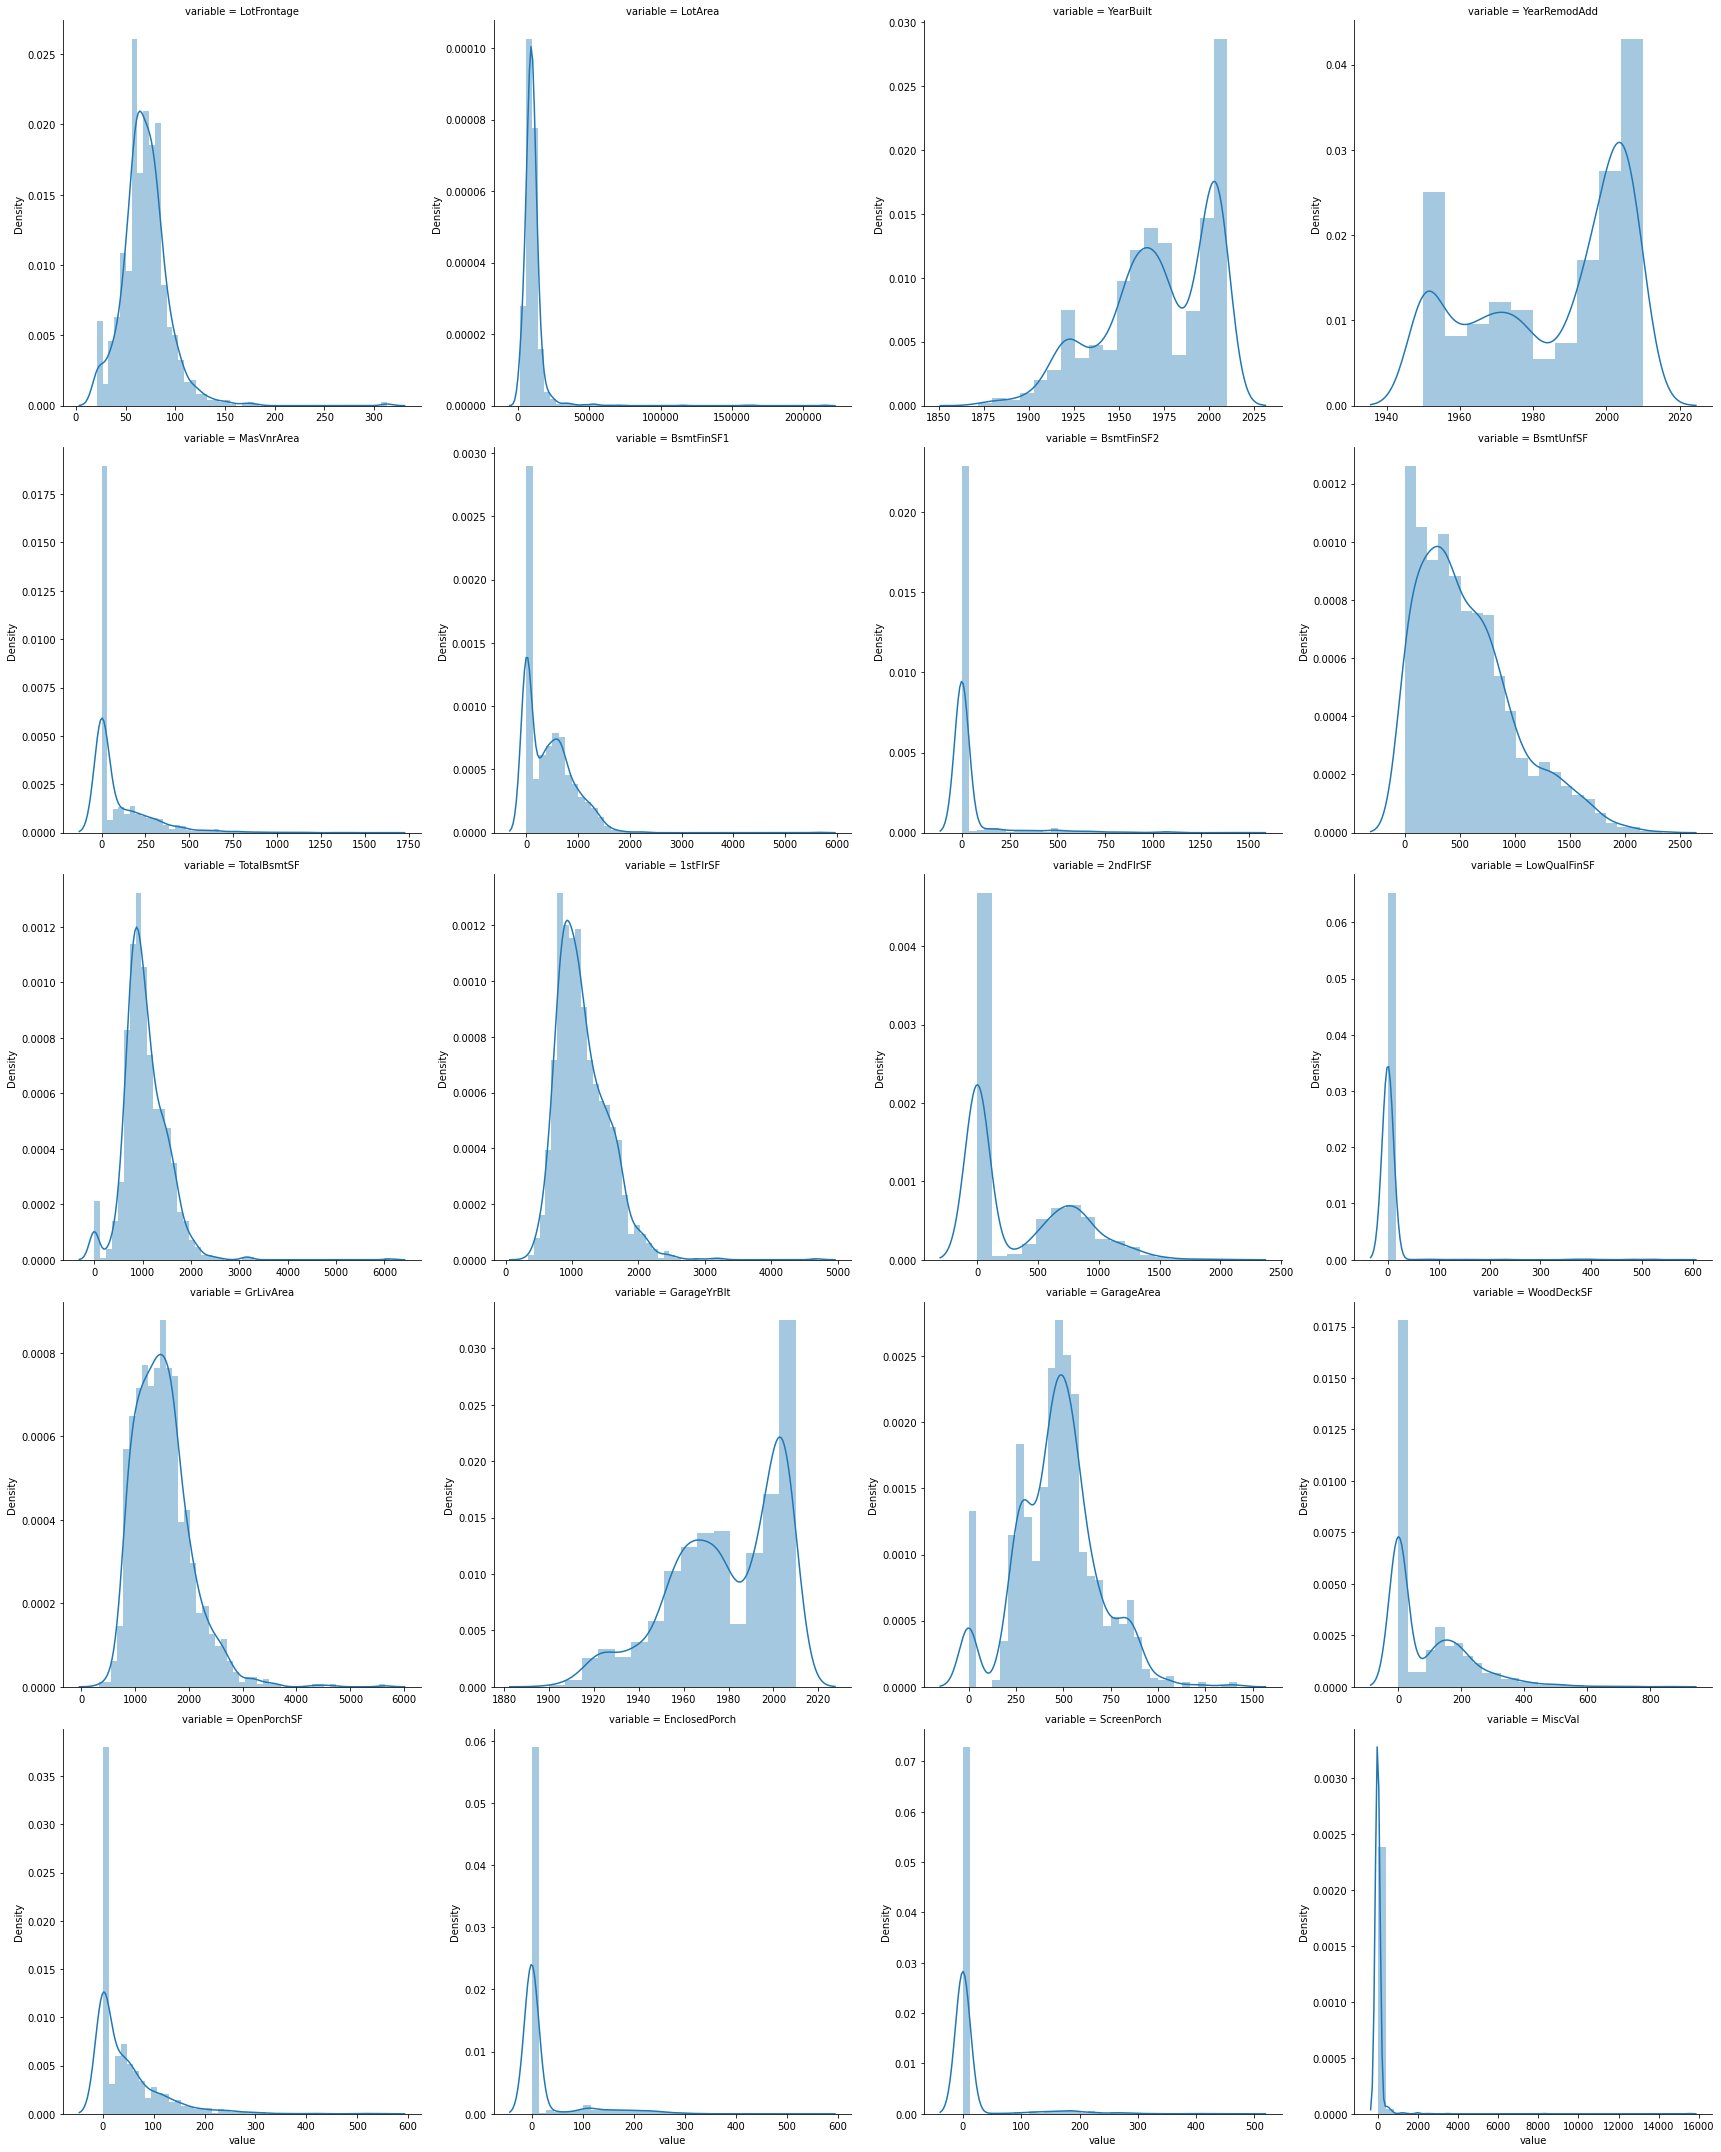

In [ ]:
m_cont = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=4, sharex=False, sharey=False, size = 6)
g.map(sns.distplot, 'value')

Lets see the connections between few features and the target value

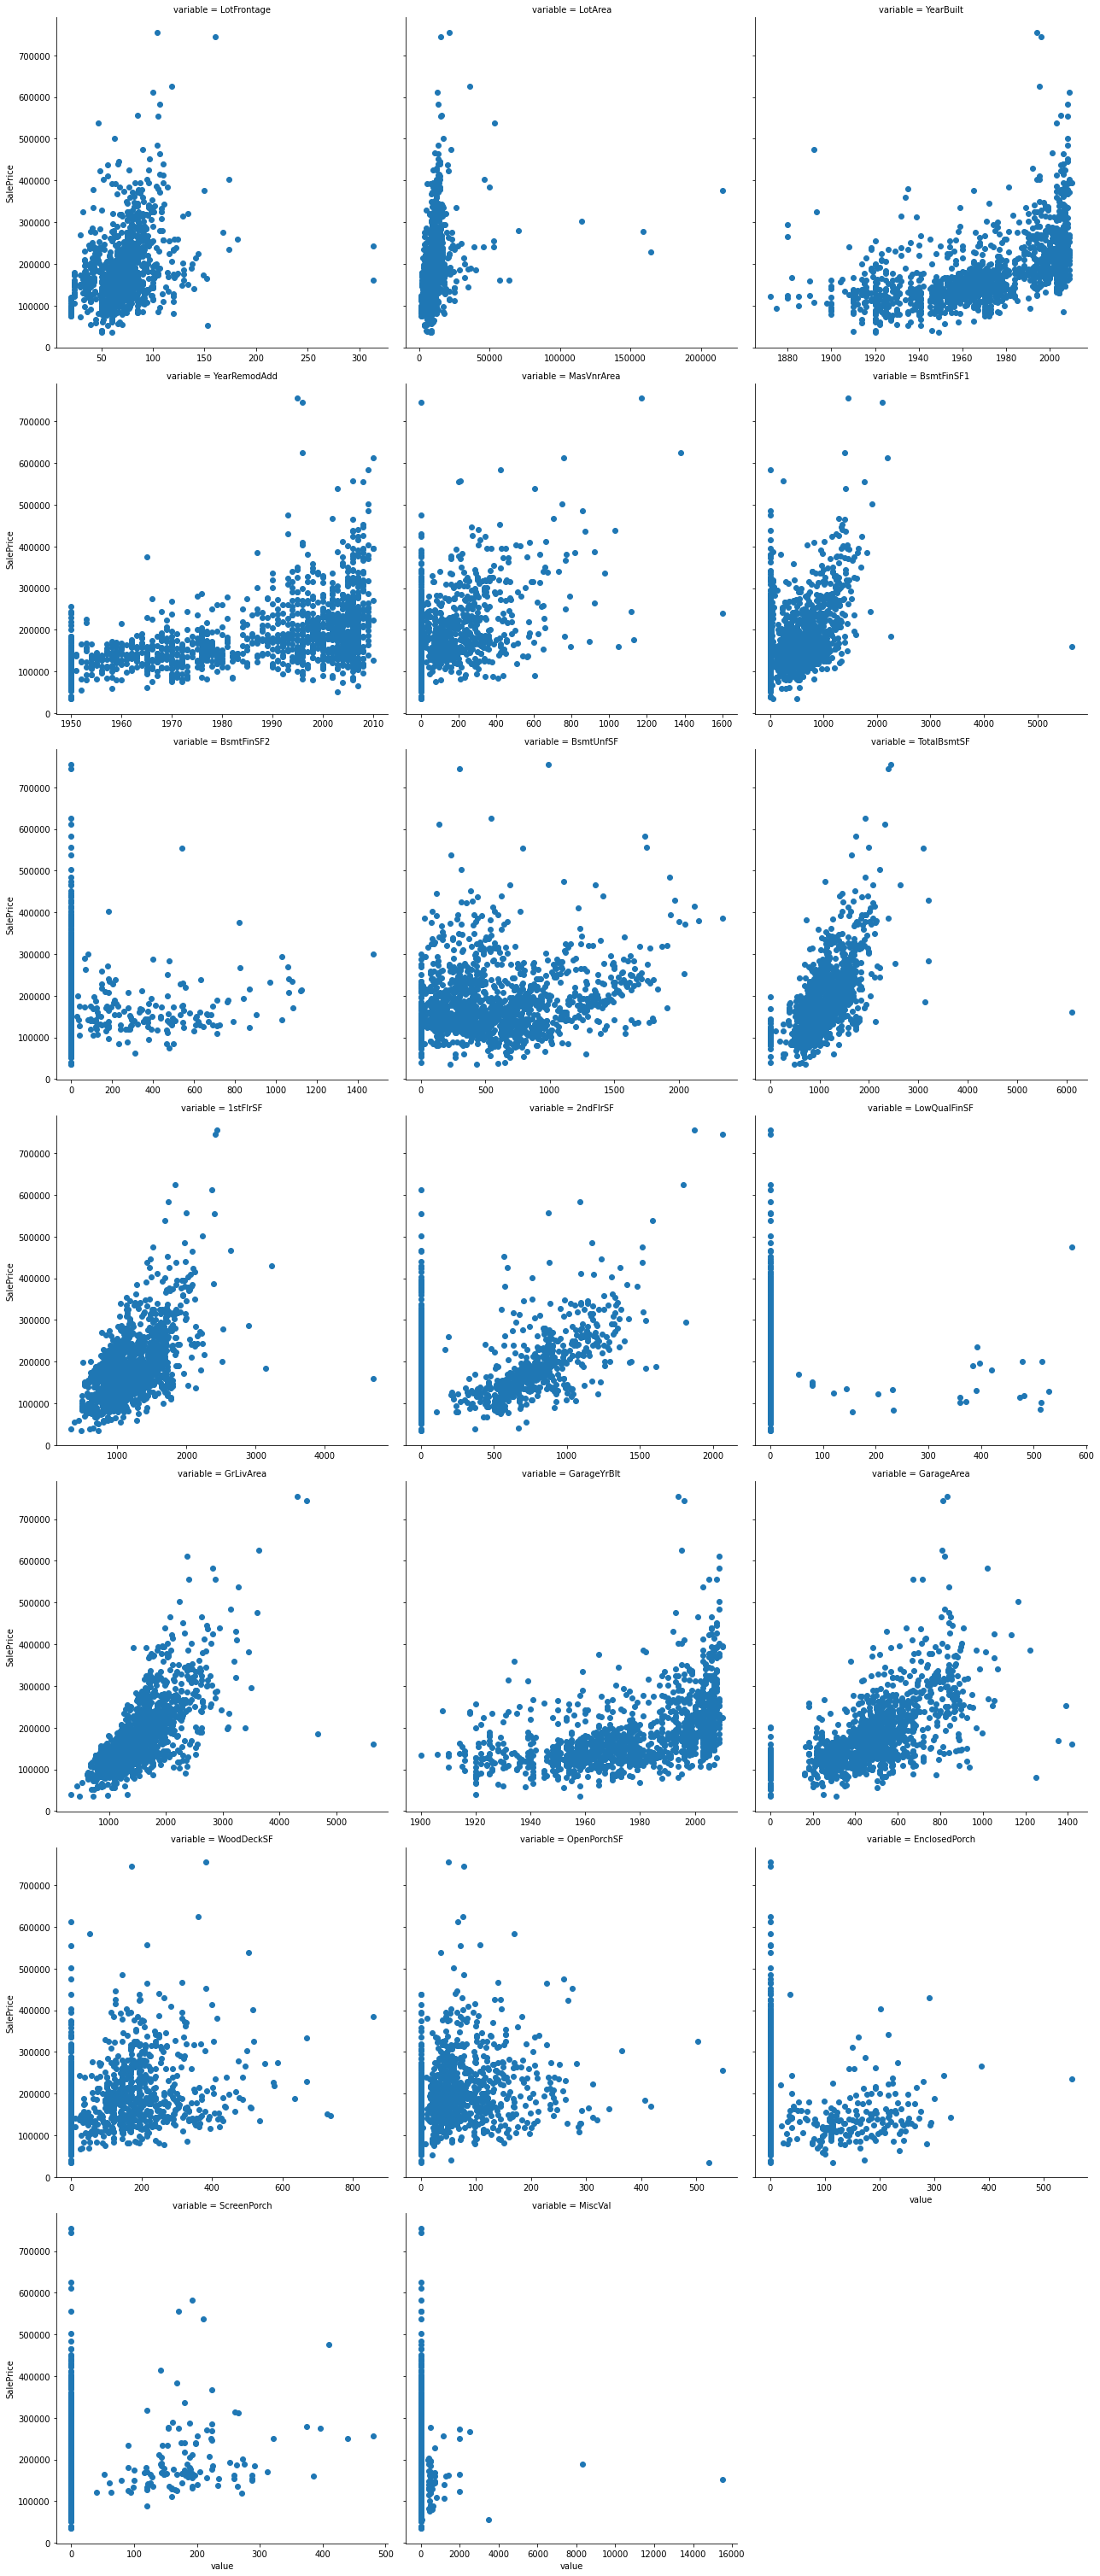

In [ ]:
m_cont = pd.melt(df, id_vars='SalePrice', value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=3, sharex=False, sharey=True, size = 6)
g.map(plt.scatter, 'value', 'SalePrice')

We can see some interesting things:
1. There is no linear connection between the LotArea and the sale price. Maybe it is because most of the houses have similar size
2. There is quite linear connection between the YearBuilt feature to the sale price - houses that had been built recently have a higher sale price
3. There is storng linear connection between GrLivArea feature to the sale price

There are few more features with linear or other connection to the sale price

Now, lets see how the target variable is disterbuted

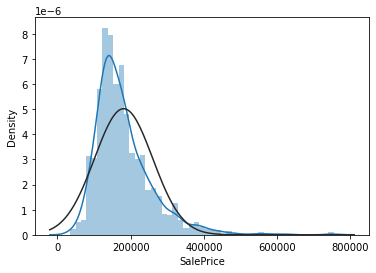

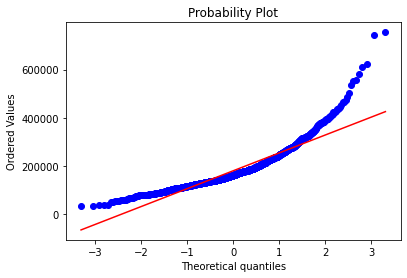

In [ ]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

We can see that the SalePrice is not normal. Lets make this column normal

In [ ]:
df['SalePrice'] = np.log(df['SalePrice'])

And, see the result

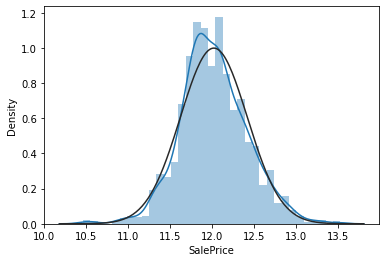

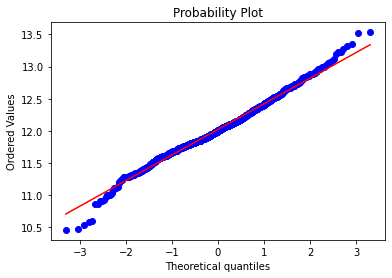

In [ ]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

We can see now that the sale price is normal. I hope this will improve my predicitons

Lets see the correlction brtween every two features

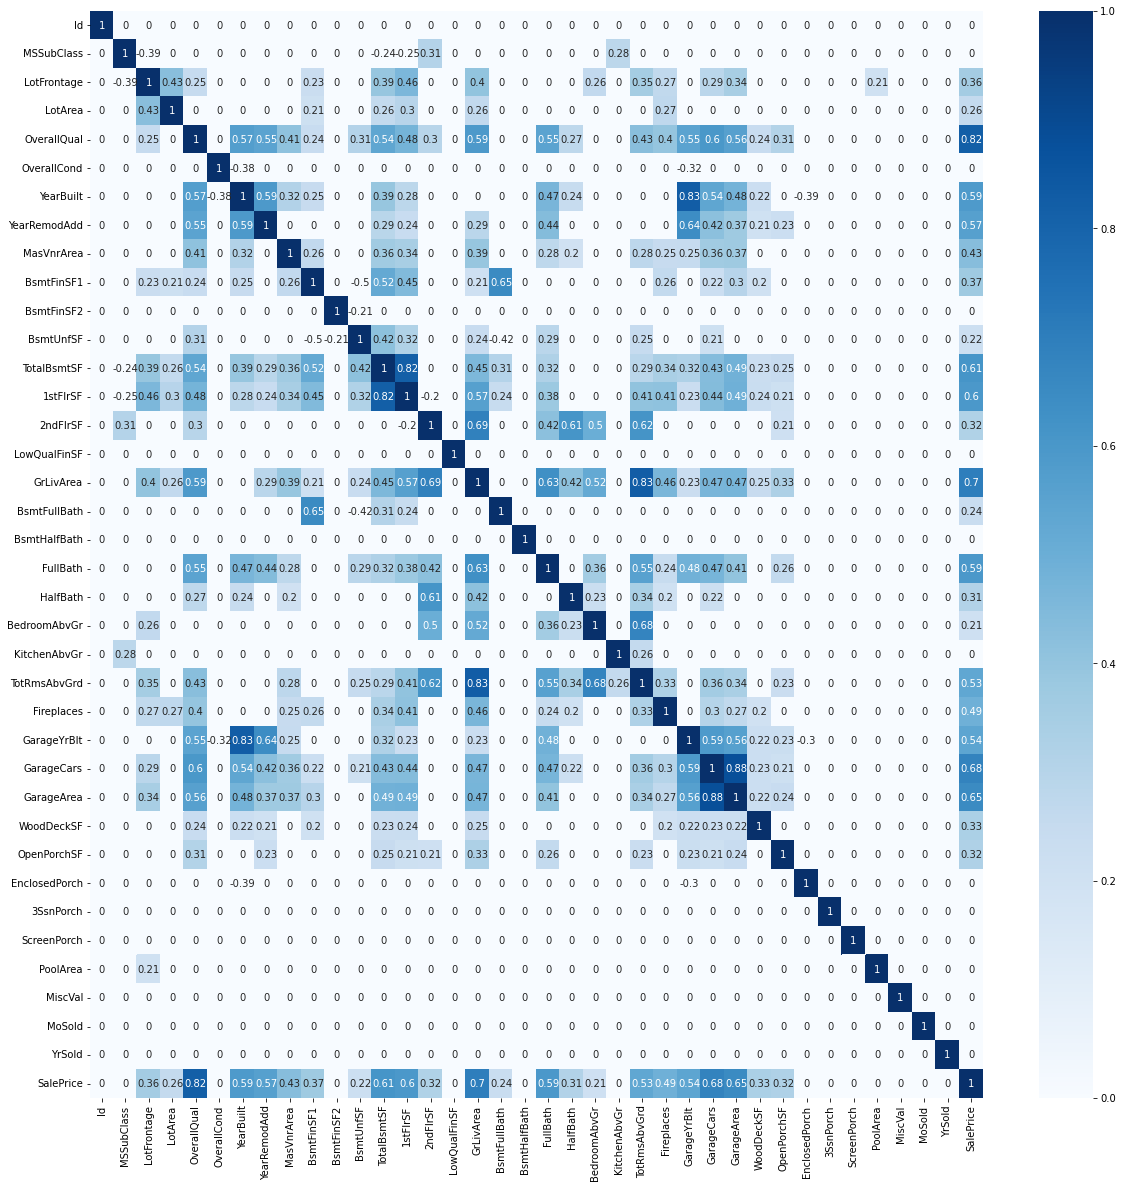

In [ ]:
plt.figure(figsize=(20,20))
cor = df.corr()
cor[(cor < 0.2) & (cor > -0.2)] = 0 # Replace weak correlation by 0 for a better visibility
sns.heatmap(cor, annot=True,
            cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.show()

# Handling with missing values

Lets see waht about missing values

In [ ]:
pd.options.display.max_rows=None ## shows all the rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We can see that we have a few columns with a lot missing values, I will drop them first and also drop the id column

In [ ]:
df.drop(['Id', 'Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Lets check how the numercial features are splited and what is the most common value in each categorial feature

In [ ]:
def check_features(df):
  numerical_cols = df.dtypes[df.dtypes != 'object'].index
  object_cols= df.dtypes[df.dtypes != 'object'].index
  for col in df.columns[df.isnull().any()]:
    if col in numerical_cols:
      print(col)
      sns.distplot(df[col])
      plt.show()
    else:
      print(col)
      print(df[col].value_counts())
    print('\n\n')

LotFrontage


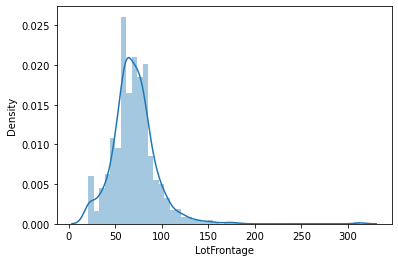




MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64



MasVnrArea


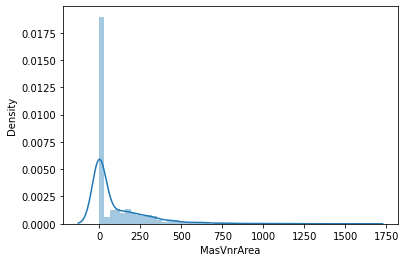




BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64



BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64



BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64



BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64



BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64



Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64



FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64



GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64



GarageYrBlt


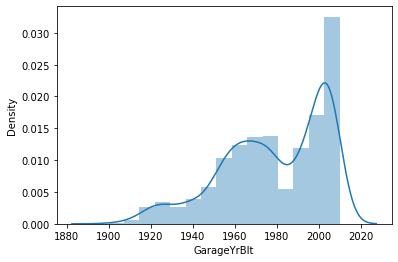




GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64



GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64



GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64





In [ ]:
check_features(df)

We can see that most of the numercial featrues are splited with normal disterbution. I will fill missing values with the mean value. In the case of 'MasVnrArea' I will fill missing values with 0.

Missing values in categorial features will be complete so that the column's distribution will conserves

Function that choose random values accroding to the distribution

In [ ]:
def choose_random_with_weight(s):
  count = sum(s.values)
  w = [s.values[i]/count for i in range(len(s))]
  return random.choices(s.keys(), weights=w, k=1)

Function that fill each categorial feature with missing values with the value that will conserves the distribution

In [ ]:
def fill_null_categorial(df, cols):
  for col in cols:
    for index, row in df.iterrows():
        if(pd.isnull(row[col])):
            v = choose_random_with_weight(df[col].value_counts())
            df[col].iloc[index] = v[0]



Function that fill numerical features with missing values with the mean value or 0  

In [ ]:
def fill_null_numerical(df, cols):
  for col in cols:
    if col == 'MasVnrArea':
      df[col] = df[col].fillna(0)
    else:
      df[col].fillna(df[col].mean(), inplace=True)

find all categorial features with missing values and fill them

In [ ]:
missing_categorial = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]
fill_null_categorial(df, missing_categorial)

find all numerical features with missing values and fill them

In [ ]:
missing_numeric = df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().any()]
fill_null_numerical(df, missing_numeric)

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

Print any column with missing values

In [ ]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


Finnaly, we finish to handle with missing values. We are ready for the next step - Data Pre-processing

# Data Pre-processing

We have few categorial columns. Lets check what is the best encoder

First, lets see our categorial columns

In [ ]:
numerical_features = df.dtypes[df.dtypes != 'object'].index
numerical_features = numerical_features.drop('SalePrice')
#scaler = MinMaxScaler()
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
data_object = df.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
df[data_object].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Now, lets prepare few encoders

In [ ]:
oe = OrdinalEncoder().fit(df[data_object])
le = LabelEncoder()


encoder_names = ['Ordinal Encoder', 'Label Encoder']

A function that create a new encoded data frame

In [ ]:
def encode(df, columns_names, enc):
    df_cp = df.copy()
    if enc == le:
        df_enc = df_cp.copy()
        for features in data_object:
            df_enc[features] = le.fit_transform(df_cp[features].astype(str))
    else:
        df_cat = df_cp[columns_names]
        df_cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=columns_names)
        df_enc = df_cp.drop(columns_names, axis=1).join(df_cat_enc)
    return df_enc




df_oe = encode(df, data_object, oe)
df_le = encode(df, data_object, le)

Compare accuracy of different encoding methods

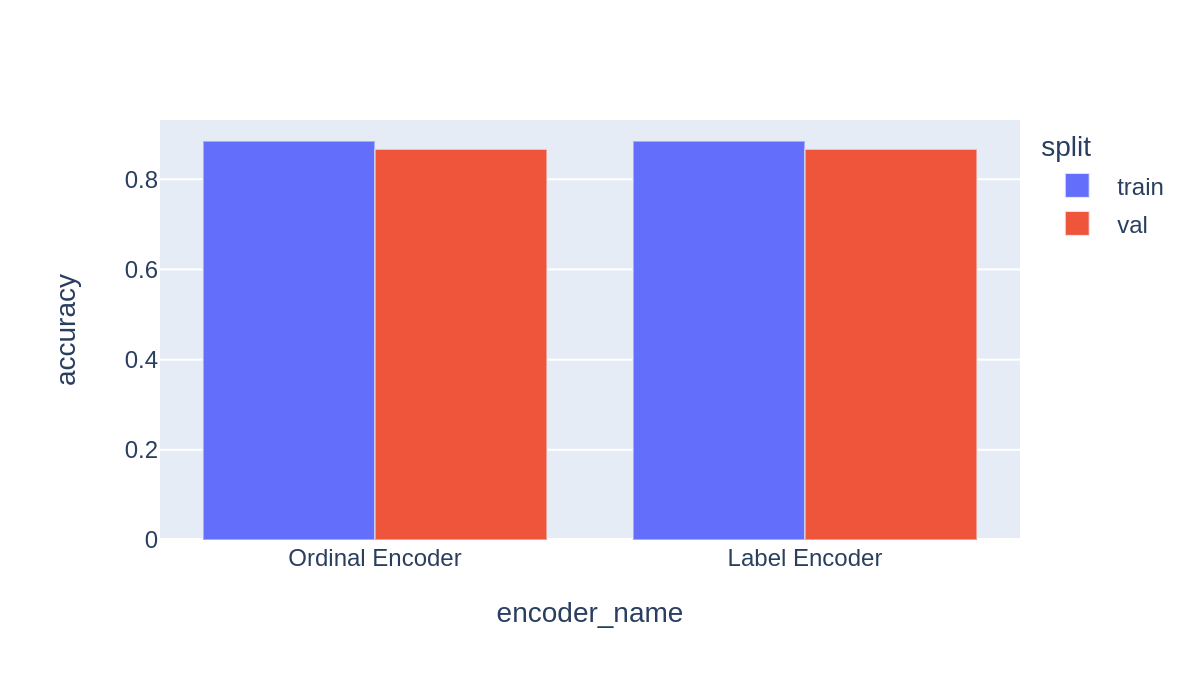

In [ ]:
def show_accuracy_by_encoder(dfs, encoder_names):
    accuracy_df = pd.DataFrame(columns=['encoder_name', 'split', 'accuracy'])

    for i, df in enumerate(dfs):
        X = df.drop(['SalePrice'],axis=1)
        t = df['SalePrice']
        X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, random_state=1)
        encoder_name = encoder_names[i]
        model = LinearRegression()
        model.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [encoder_name, 'train', model.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [encoder_name, 'val', model.score(X_val, t_val)]
    fig = px.bar(accuracy_df, x='encoder_name', y='accuracy', color='split', barmode='group')
    if is_to_image:
      img_bytes = fig.to_image(format="png", width=600, height=350, scale=2)
      display(Image(img_bytes))
    else:
      display(fig)
dfs = [df_oe, df_le]
show_accuracy_by_encoder(dfs, encoder_names)

We can see a few things:
1. The dummy encoder have a higer accuarcy on the test data but a lower accuarcy on the validation data (overfitting)
2. The Ordinal Encoder and Label Encoder have good result on test and validation data (nice fitting)
So I will choose the label encoding

Lets see what is the best way to split the data

In [ ]:
X = df_le.drop(['SalePrice'],axis=1)
t = df_le['SalePrice']

In [ ]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


# Handle with outliers

Visualize boxplot for each numercial feature

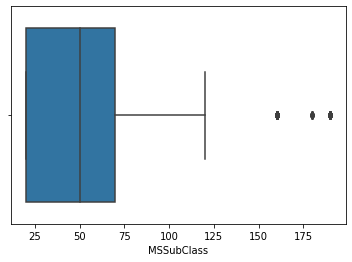

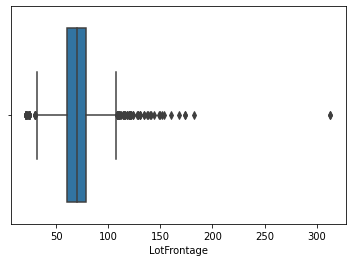

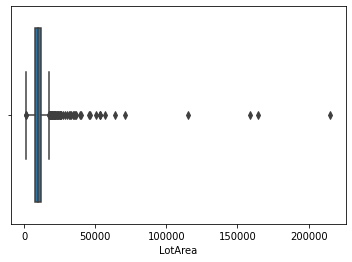

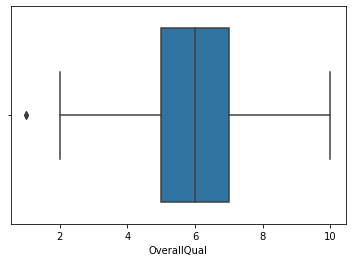

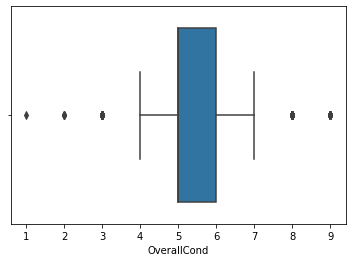

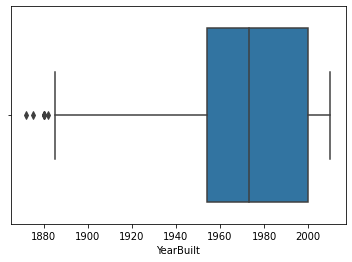

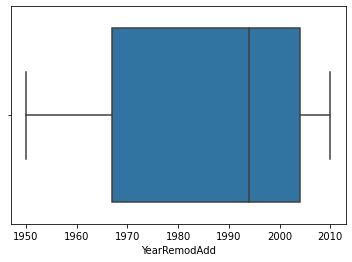

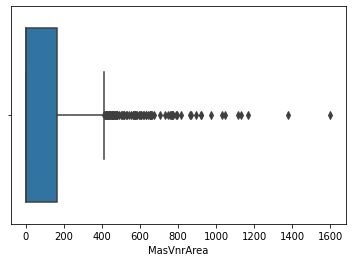

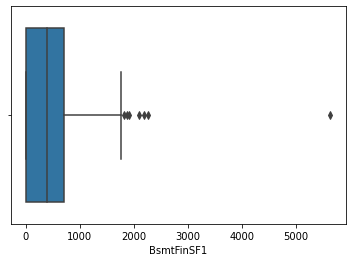

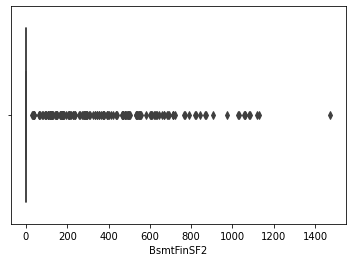

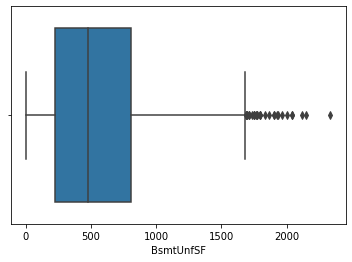

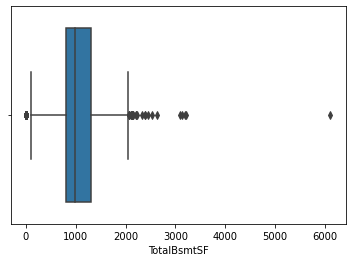

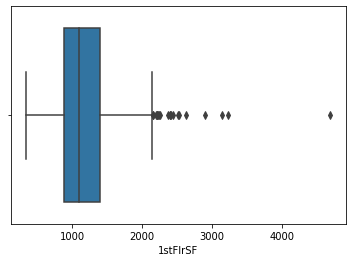

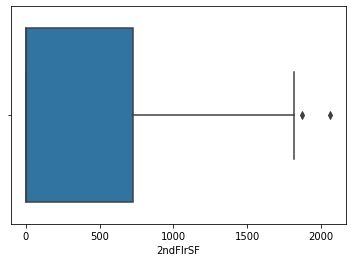

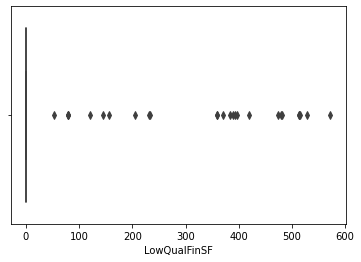

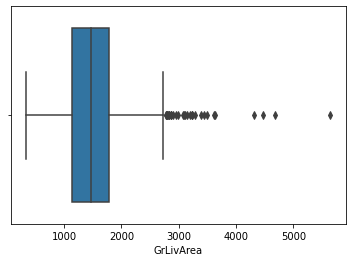

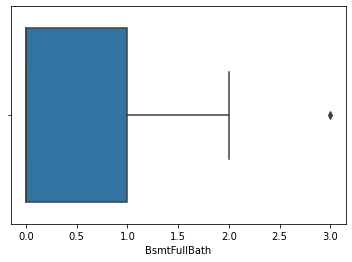

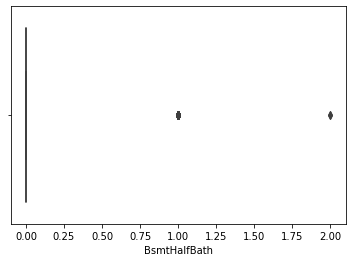

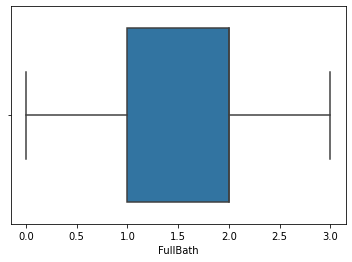

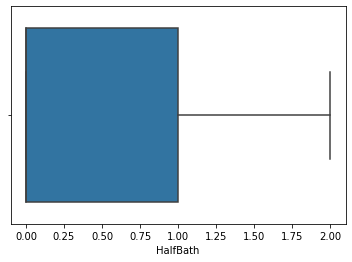

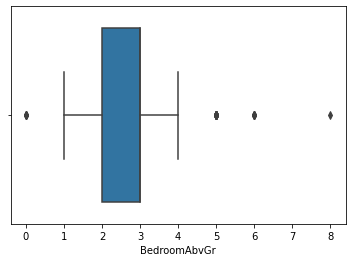

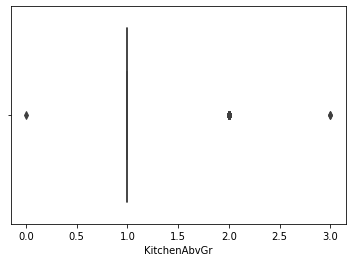

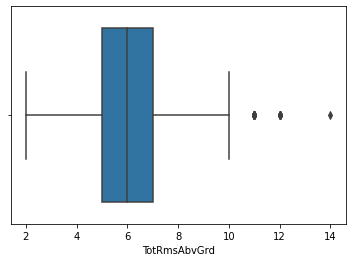

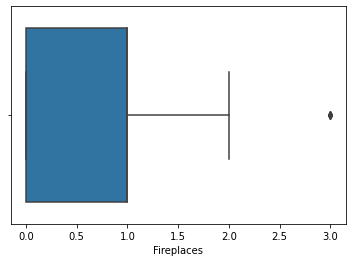

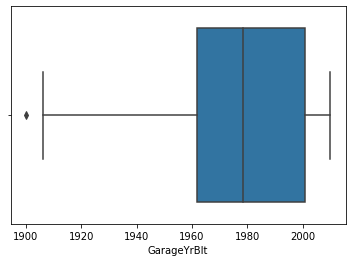

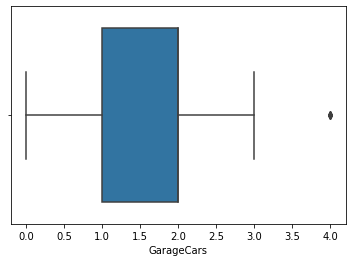

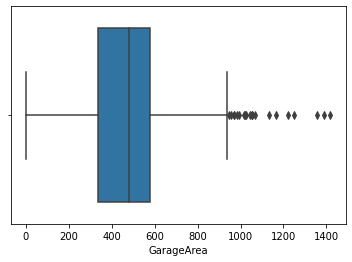

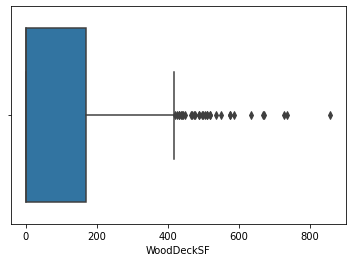

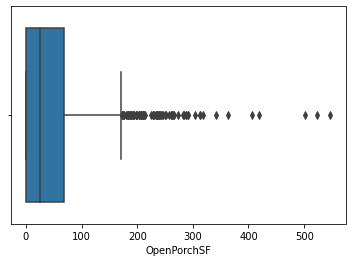

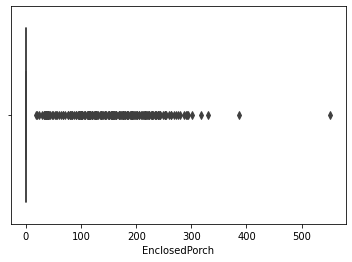

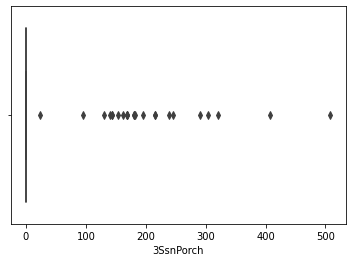

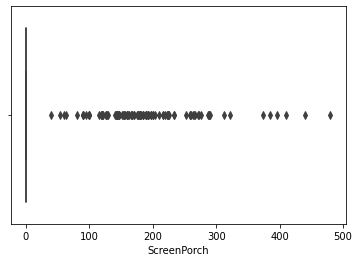

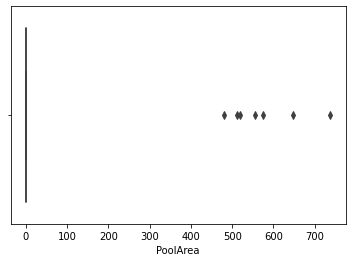

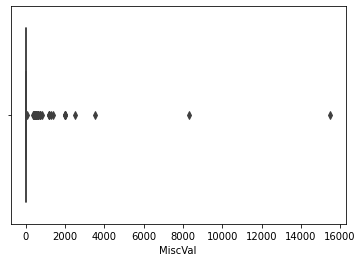

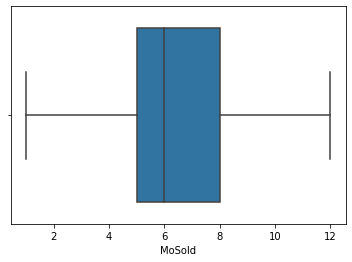

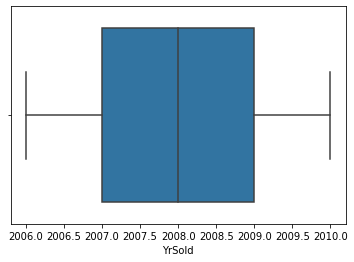

In [ ]:
for feature in numerical_features:
  sns.boxplot(df[feature])
  plt.show()

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = X #We can't change train while running through it
tWithoutOutliers = t

for column in X:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(X[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = X.drop(outlierValuesList) #Drop outlier rows
    tWithoutOutliers = t.drop(outlierValuesList)

X = trainWithoutOutliers.reset_index(drop=True)
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
t = tWithoutOutliers.reset_index(drop=True)

# Cross - Validation

I will use Cross-Validation instead of breaking the data to train-validation splits. With CV I hope to get better result on the test set

Lets check what is the best KFold size

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')
    best_val_loss_index = 0
    best_val_loss = 1
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        if model.score(X_train, t_train) < 0 or model.score(X_val, t_val) < 0:
          pass
        else:
          scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
          scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]
          if mean_squared_error(t_val, y_val) < best_val_loss:
            best_val_loss = mean_squared_error(t_val, y_val)
            best_val_loss_index = i

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        if is_to_image:
          img_bytes = fig.to_image(format="png", width=800, height=400, scale=2)
          display(Image(img_bytes))
        else:
          fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        if is_to_image:
          img_bytes = fig.to_image(format="png", width=800, height=400, scale=2)
          display(Image(img_bytes))
        else:
          fig.show()
    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss, best_val_loss_index

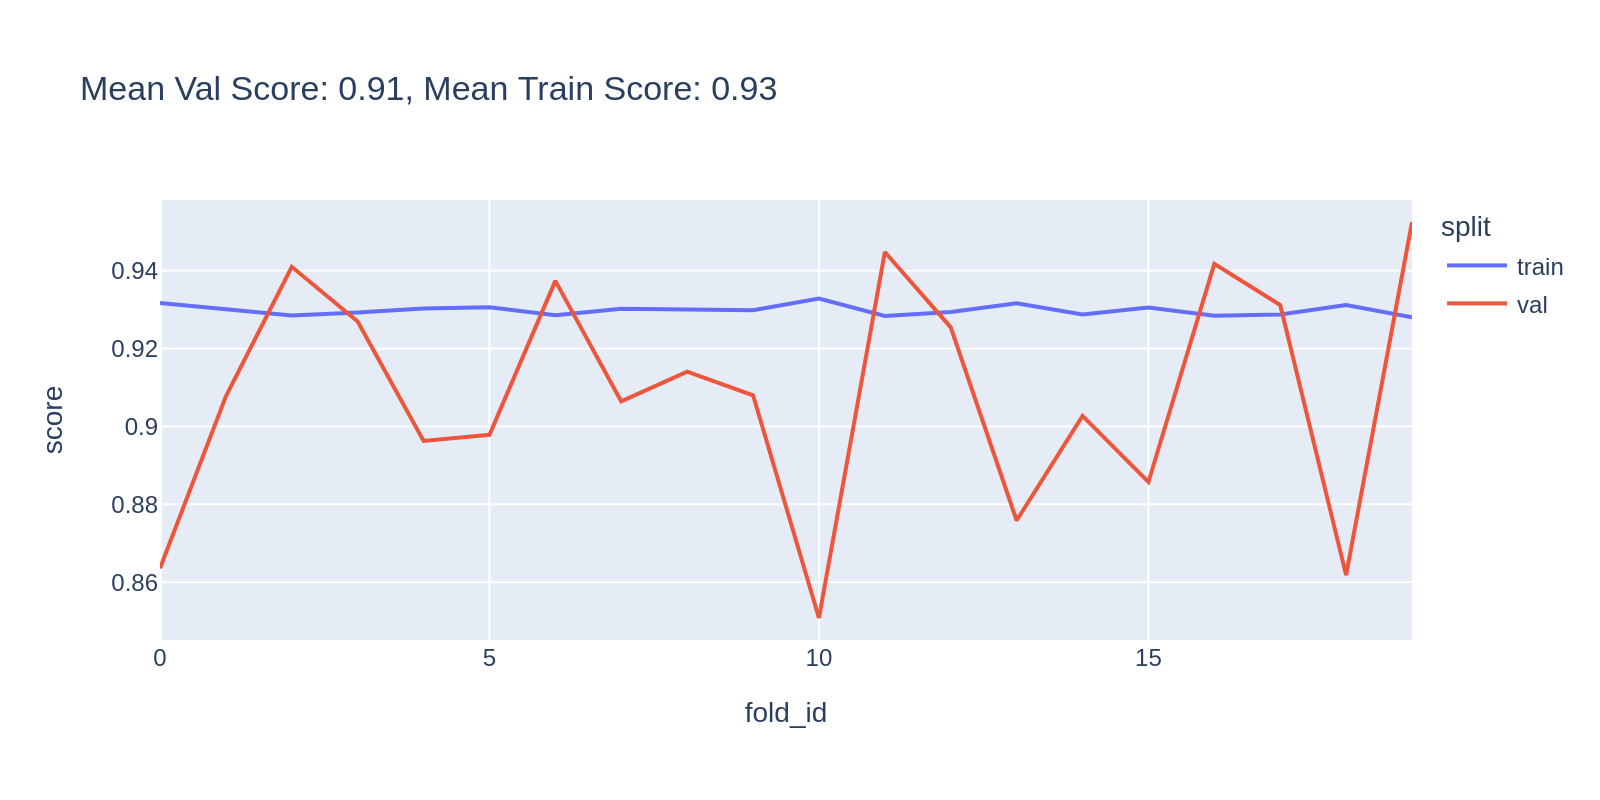

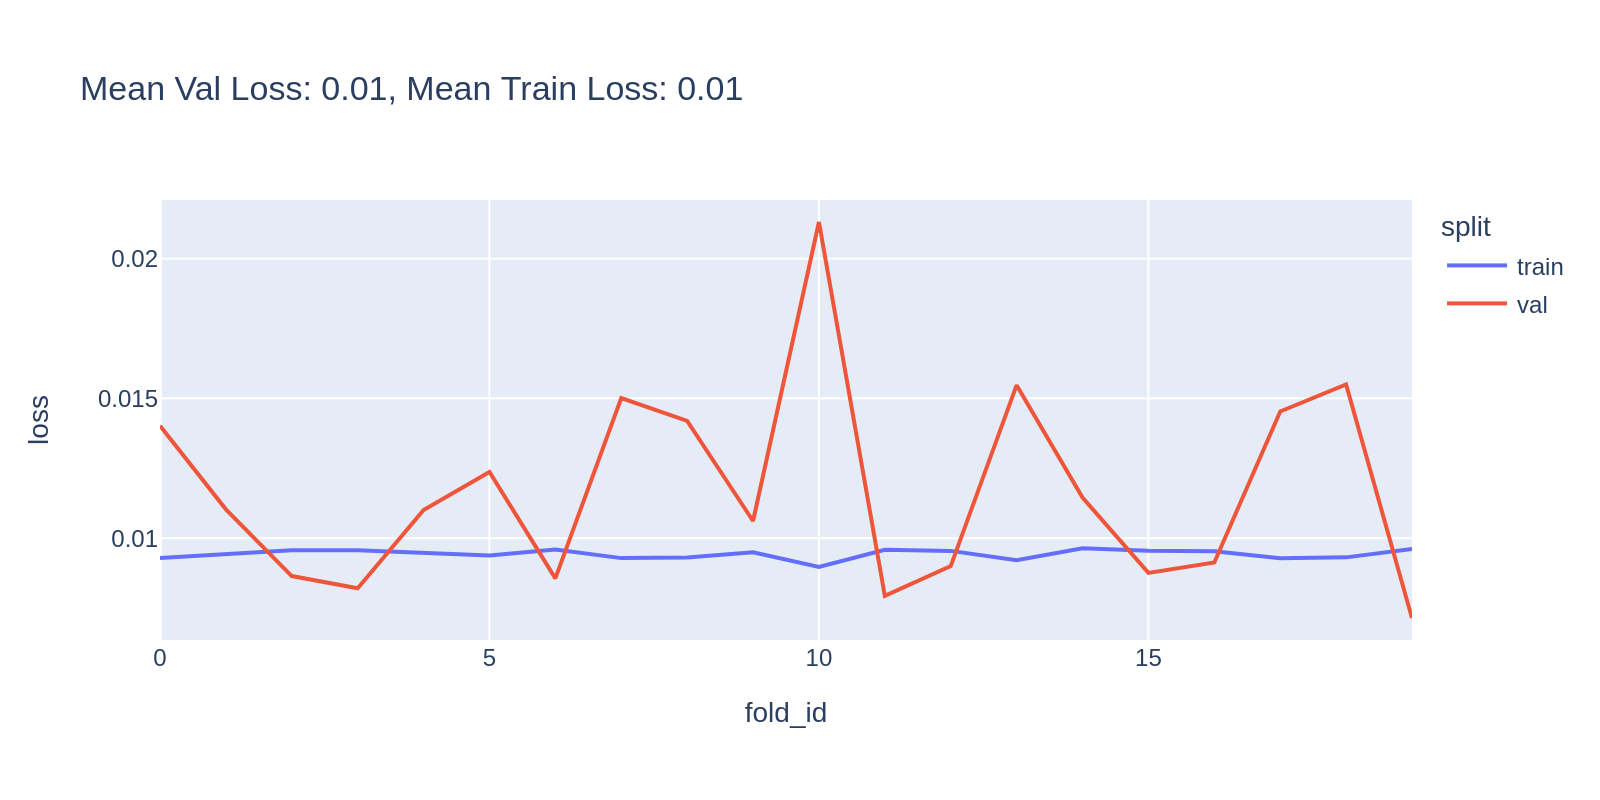

mean cv val score: 0.91
mean cv val loss 0.01
mean cv train score: 0.93
mean cv val loss 0.01
Best K split: 19


In [ ]:
model = LinearRegression()
#X = df.drop(['SalePrice'],axis=1)
#t = df['SalePrice']
val_score, val_loss, train_score, train_loss, best_split =\
 get_cv_score_and_loss(X, t,
                       model,
                       k=20, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')
print('Best K split:', best_split)

We can see that we get similar result on a few sizes of k-fold.

# Regularization
Now, lets find the best regularization method.

We use regularization in order to prevent from our model to overfit to the train data and reduce high variance

In [ ]:
scores_df = pd.DataFrame(columns=['model name', 'mean score'])

#print("R2 best score for regression:")
lasso_model = Lasso(alpha=0.1)
score = cross_val_score(
          make_pipeline(
              lasso_model),
              X, t, cv=best_split)
#print(score)
max = np.amax(score)
mean = score.mean()
scores_df.loc[len(scores_df)] = ["Lasso", mean]
#print('lasso\nmax =', max, ' mean =', mean, '\n\n')


ridge_model = Ridge(alpha=0.1)
score = cross_val_score(
          make_pipeline(
              ridge_model),
              X, t, cv=best_split)
max = np.amax(score)
mean = score.mean()
scores_df.loc[len(scores_df)] = ["Ridge", mean]
#print('ridge\nmax =', max, ' mean =', mean, '\n\n')


elastic_net_model = ElasticNet(alpha=0.1)
score = cross_val_score(
          make_pipeline(
              elastic_net_model),
              X, t, cv=best_split)
max = np.amax(score)
mean = score.mean()
#print('elastic_net\nmax =', max, ' mean =', mean)
scores_df.loc[len(scores_df)] = ["Elastic net", mean]

fig = px.bar(scores_df, x='model name', y='mean score', color='model name', barmode='group')
display(fig)

We can see that the best regularzation method for our data is Ridge. I will use this method.

Lets find the best alpha for Ridge model

In [ ]:
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, random_state=42)
arr = np.arange (0.001, 1, 0.005)
t_scores = []
v_scores = []
v_error = []
best_alpha = 0
lowest_error = 1
for a in arr:
  model = Ridge(alpha=a)
  model.fit(X_train, t_train)
  mean_squared_error
  t_scores.append(model.score(X_train, t_train))
  v_scores.append(model.score(X_val, t_val))
  error = mean_squared_error(t_val, model.predict(X_val))
  if error < lowest_error:
    best_alpha = a
    lowest_error = error
  v_error.append(error)
fig = go.Figure()
fig.add_trace(go.Scatter(x=arr
                         , y=v_error))


In [ ]:
print(best_alpha)

0.341


# Feature Selection

We want to choose the best features from our dataset. Lets check who are they


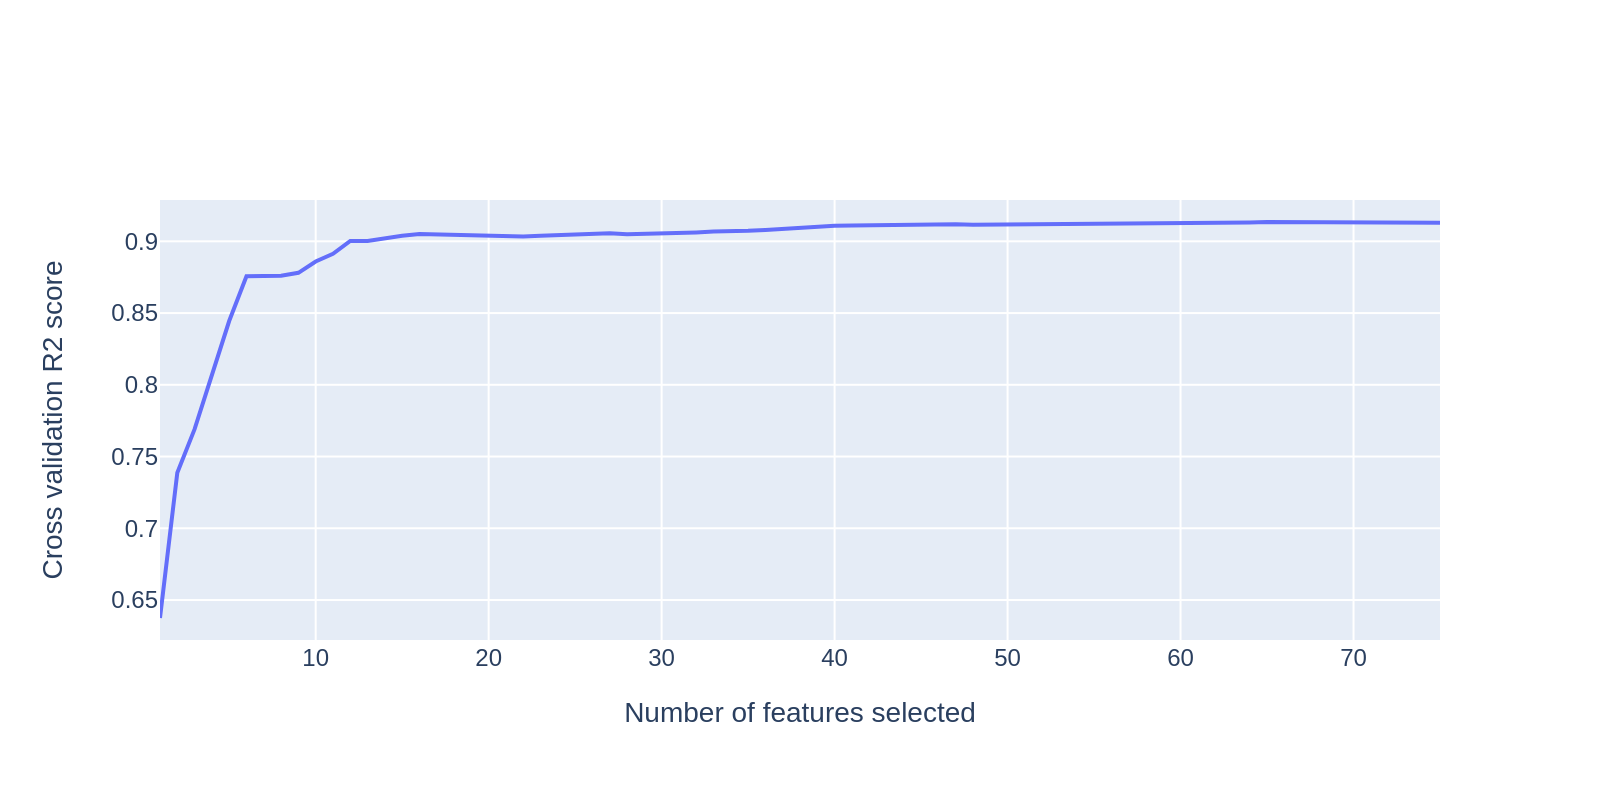

In [ ]:
selector = RFECV(
    Ridge(alpha=best_alpha),
    cv=RepeatedKFold(n_splits=best_split, n_repeats=10, random_state=1)
    ).fit(X, t)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                         , y=selector.cv_results_['mean_test_score']))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation R2 score")
if is_to_image:
  img_bytes = fig.to_image(format="png", width=800, height=400, scale=2)
  display(Image(img_bytes))
else:
  fig.show()



We can see that from around 15 features and more we get very similiar results

Lets see what is the best subset of features

In [ ]:
best_features = selector.get_feature_names_out()
print(len(best_features))
best_features

66


array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

Take only the features that helps us get the best score

In [ ]:
X = X[best_features]
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LandSlope,Condition1,Condition2,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,3,0.150685,0.033420,1,3,3,0,2,2,...,2,0.000000,0.111517,0.0,0.000000,0.0,0.0,0.000000,0.090909,0.50
1,0.000000,3,0.202055,0.038795,1,3,3,0,1,2,...,2,0.347725,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.363636,0.25
2,0.235294,3,0.160959,0.046507,1,0,3,0,2,2,...,2,0.000000,0.076782,0.0,0.000000,0.0,0.0,0.000000,0.727273,0.50
3,0.235294,3,0.215753,0.060576,1,0,3,0,2,2,...,2,0.224037,0.153565,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.50
4,0.176471,3,0.219178,0.059899,1,0,3,0,2,2,...,2,0.046674,0.054845,0.0,0.629921,0.0,0.0,0.045161,0.818182,0.75


Lets train the model with the best alph we found, the best kfold size and the set of features we have found

In [ ]:
kf = KFold(n_splits=best_split, shuffle=True, random_state=42)
model = Ridge(alpha = best_alpha)
for i, (train_ids, val_ids) in enumerate(kf.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)
        print(mean_squared_error(t_val, model.predict(X_val), squared=False))

0.12335518614729428
0.0939901941656944
0.09883581414103898
0.10167449515158763
0.10576928157865813
0.09314331150287451
0.09538177809086623
0.1252312777862995
0.10784222959888067
0.09887625212499243
0.1344674402712927
0.09306072715563103
0.12131123852282674
0.08715288999018722
0.08054351613889528
0.10114746903939682
0.11654742901318856
0.11099044502750871
0.094629360574928


Lets check the score and the mse on the train and test sets

In [ ]:
print(model.score(X_train, t_train))
print(model.score(X_val, t_val))

y_train = model.predict(X_train)
y_val = model.predict(X_val)

print(mean_squared_error(t_train, y_train, squared=False))
print(mean_squared_error(t_val, y_val, squared=False))

0.9283005095533069
0.9383787907308188
0.09794994795427378
0.094629360574928


We can see we get quite good result on the train and validation sets

# Preapre for predict on test data

First, read the data and check for missing values

In [ ]:
df_test = pd.read_csv('/content/f1640dd059ecae8df5bc6f9875a52839/house_prices_test.csv')
df_test_id = df_test['Id']

Throw columns with a lot missing values

In [ ]:
df_test.drop(['Id', 'Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df_test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

We can see that a few columns have similar amount of missing values like in the train set, and a few more columns with missing values in spite of they don't have missing values in the train set

Lets check how the numercial features are splited and what is the most common value for categorial features

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64



LotFrontage


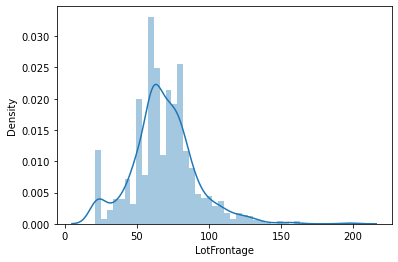




Utilities
AllPub    1457
Name: Utilities, dtype: int64



Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64



Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64



MasVnrType
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64



MasVnrArea


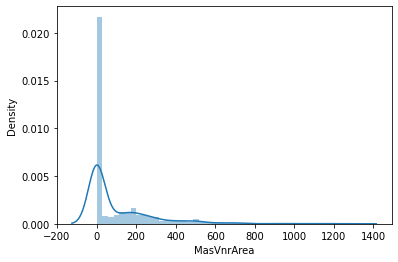




BsmtQual
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64



BsmtCond
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64



BsmtExposure
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64



BsmtFinType1
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64



BsmtFinSF1


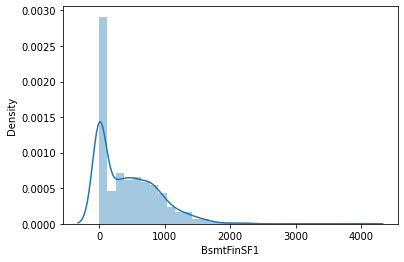




BsmtFinType2
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64



BsmtFinSF2


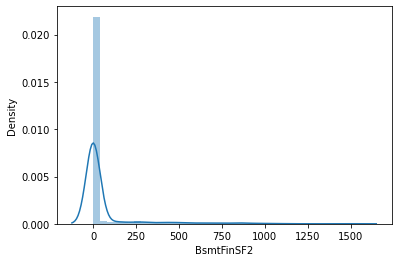




BsmtUnfSF


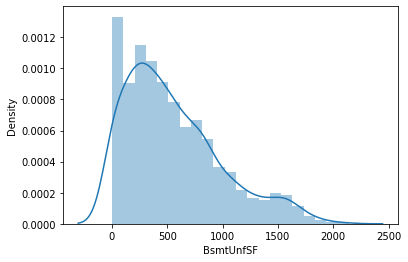




TotalBsmtSF


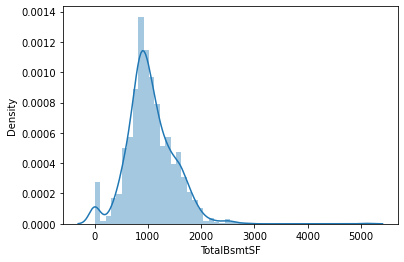




BsmtFullBath


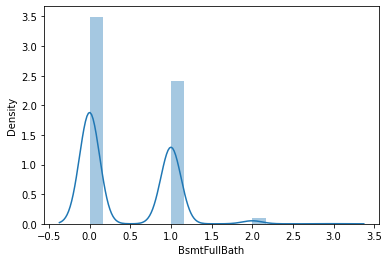




BsmtHalfBath


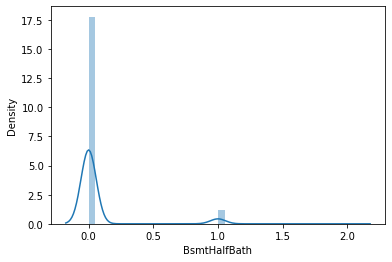




KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64



Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64



FireplaceQu
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64



GarageType
Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64



GarageYrBlt


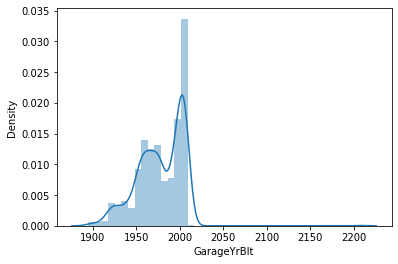




GarageFinish
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64



GarageCars


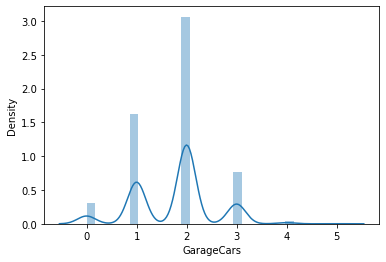




GarageArea


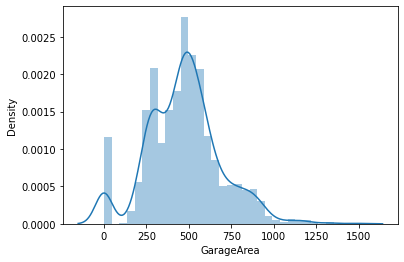




GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64



GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64



SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64





In [ ]:
numerical_cols = df_test.dtypes[df_test.dtypes != 'object'].index
object_cols= df_test.dtypes[df_test.dtypes != 'object'].index
for col in df_test.columns[df_test.isnull().any()]:
  if col in numerical_cols:
    print(col)
    sns.distplot(df_test[col])
    plt.show()
  else:
    print(col)
    print(df_test[col].value_counts())
  print('\n\n')

Lets handle with missing values in the same way we handled in the train data (insert mean or 0 to numerical fetaures and insert values that will preserve the distribution of categorial features).

After that, scaler our numerical features and encode our categorial features

In [ ]:
def prepare_test(df):
  missing_categorial = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]
  fill_null_categorial(df, missing_categorial)


  missing_numeric = df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().any()]
  fill_null_numerical(df, missing_numeric)

  numerical_features = df.dtypes[df.dtypes != 'object'].index
  scaler = MinMaxScaler()
  df[numerical_features] = scaler.fit_transform(df[numerical_features])

  le = LabelEncoder()
  categorial_features = df.select_dtypes(include = "object").columns
  for features in categorial_features:
    df[features] = le.fit_transform(df[features].astype(str))



In [ ]:
df_test = df_test[best_features]
prepare_test(df_test)

Check if they are still missing values in the test set

In [ ]:
print(df_test.columns[df_test.isnull().any()])

Index([], dtype='object')


Now, our test data is ready to be predicted

In [ ]:
X_test = df_test.copy()
y_test = model.predict(X_test)
y_test = np.exp(y_test)
#X_test.head()

In [ ]:
final_df = pd.DataFrame(y_test, columns=['SalePrice'])
final_df = pd.DataFrame(df_test_id).join(final_df)
my_submission = final_df
my_submission.to_csv('submission.csv', index=False)

In [ ]:
df.isnull().sum()

Id           0
SalePrice    0
dtype: int64